# Search text

In [1]:
import io, json

vacancy_search_text = "angular frontend junior"

def load_json_from_file(path):
    with io.open(path, encoding='utf-8', mode='r') as  json_file:
        return json.load(json_file)

raw_vacancy_data = load_json_from_file("json/"+vacancy_search_text+".json")
print(vacancy_search_text)

angular frontend junior


In [2]:
import datetime
def prepare_vacancy_data(vacancy_data):
    new_vacancy_data = []
    for vacancy in vacancy_data:
        new_vacancy = {}        
        new_vacancy["key_skills"] = ', '.join(list(vacancy["key_skills"] or []))
        #new_vacancy["key_skills"] = list(vacancy["key_skills"] or [])
        #new_vacancy["key_skills"] = pd.Series(data=list(vacancy["key_skills"] or []))
        new_vacancy["name"] = vacancy["name"]
        new_vacancy["id"] = vacancy["id"]        
        new_vacancy["description"] = vacancy["description"]
        new_vacancy["salary"] = vacancy["salary"]       
        new_vacancy["creation_time"] = vacancy["creation_time"]
        if "name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["name"]
        if "visible_name" in vacancy["employer"]:
            new_vacancy["employer"] = vacancy["employer"]["visible_name"]        
        
        if "schedule" in vacancy:
            if type(vacancy["schedule"]) == str:            
                new_vacancy["schedule"] = vacancy["schedule"]  
            if type(vacancy["schedule"]) == dict:            
                new_vacancy["schedule"] = vacancy["schedule"]["id"]   
            
        new_vacancy["accept_temporary"] = vacancy["accept_temporary"]       
        new_vacancy_data.append(new_vacancy)
    return new_vacancy_data

vacancys_data = prepare_vacancy_data(raw_vacancy_data)

In [3]:
import pandas as pd

df = pd.DataFrame(columns= list(vacancys_data[0].keys()))
ind = 0
for data in vacancys_data:     
    if (len(df.columns)==len(data)):
        df.loc[ind] = data
        ind+=1

In [4]:
import re 
import math
from currency_converter import CurrencyConverter
from datetime import date # datetime works too
c = CurrencyConverter()

def process_salary_value (salary_structure):
    salary = salary_structure
    salary_value = False

    if ("from" in salary) and ("to" in salary):
        salary_value = ((salary["from"] or 0) + (salary["to"] or 0))/2
    else:
        if "from" in salary:
            salary_value = salary["from"]
        if "to" in salary:
            salary_value = salary["to"]    
    return salary_value

for vacancy in vacancys_data:
    if type(vacancy["salary"]) == dict:
        salary = vacancy["salary"]        
        salary_value = process_salary_value (salary)
                
        if salary_value and ("currency" in salary):
            if not(re.search(r'RUR', salary["currency"])):
                try:
                    salary_value = math.floor(c.convert(salary_value, salary["currency"], 'RUB'))
                    df.at[vacancys_data.index(vacancy),"salary"] = salary_value
                    #print(salary_value,"from", salary["currency"])                       
                except Exception as err:
                    #print("Problems with currency "+salary["currency"], err)
                    pass
            else:
                df.at[vacancys_data.index(vacancy),"salary"] = salary_value

In [5]:
df.to_csv("csv/"+vacancy_search_text+".csv", encoding="utf8", index=False) 

In [6]:
import pandas as pd
df = pd.DataFrame()
df=pd.read_csv("csv/"+vacancy_search_text+".csv", encoding="utf8" )
pd.set_option("display.max_rows",None)
display(df)

,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
0,"Английский — A2 — Элементарный, JavaScript, CS...",Junior/Middle Front-End Developer,52239967,Приглашаем _HTML-верстальщика_ с возможностью ...,NaN,2022-02-09T11:43:08.750+03:00,Scand,FULL_DAY,False
1,"JavaScript, HTML, TypeScript, Git, CSS, HTML5,...",Junior / Middle Frontend Web-Developer,52071670,"**Concert.ua** \- мы компания, которая предос...","{'from': 30000, 'to': 60000, 'gross': False, '...",2022-02-03T13:04:59.511+03:00,concert.ua,FULL_DAY,False
2,"Git, JavaScript, TypeScript, CSS, React",Junior Frontend Developer,51247747,"Springs Tech – компания, располагающаяся в тех...",45000.0,2022-01-18T10:21:29.172+03:00,Springs Tech,FLEXIBLE,False
3,"JavaScript, Git, HTML, CSS, Angular, TypeScript",Junior/Middle Frontend Developer Angular,51924208,Компания Телеформ ИС - разработчик технологиче...,150000.0,2022-01-30T12:40:04.563+03:00,Телеформ ИС,FULL_DAY,False
4,"Git, CSS3, JavaScript, HTML5, AngularJS, Angul...",Frontend разработчик Angular (Junior/Middle),51993038,Мы набираем дружную команду разработки продукт...,110000.0,2022-02-01T13:18:08.166+03:00,Carbon Soft,FULL_DAY,False
5,"TypeScript, JavaScript, Java, Angular",Junior front-end developer,52338200,Команда развивает внутри компании одновременно...,NaN,2022-02-11T14:57:18.846+03:00,"VK, Социальные сети, Одноклассники",FLEXIBLE,False
6,"JavaScript, Typescript, HTML, CSS, ООП, Angula...",Младший Frontend разработчик,48995594,"**Мы - компания Интабия, занимаемся разработко...",30000,2021-10-20T11:16:03.466+03:00,Интабия,FLEXIBLE,False
7,"Git, CSS3, JavaScript, HTML5, Python, AngularJS",Frontend разработчик Angular (Junior/Middle),51707644,Мы расширяем дружную команду разработки продук...,110000.0,2022-01-25T12:51:30.434+03:00,Carbon Soft,FULL_DAY,False
8,"JavaScript, jQuery, Less, HTML5, CSS, CSS3, Ан...",Front-end разработчик (Junior),51237815,Привет! Предлагаем познакомиться =)Ремарк — оп...,30000,2022-01-18T07:51:00.482+03:00,Ремарк,FLEXIBLE,False
9,"JavaScript, Node.js, PHP, HTML, Git",Frontend-разработчик (Junior),50665257,"Требуются активные начинающие специалисты, гот...",45000.0,2021-12-23T18:33:59.426+03:00,Itwis,FLEXIBLE,False


In [7]:
def make_simple_word_pie(data_frame,collumn,title):
    plt.title(title or collumn)
    word_series = df[collumn]
    word_series = pd.Series(data=list(Counter(word_series.values)), 
                                index=list(Counter(word_series.values).values()))
    wedges, patches, texts = plt.pie(word_series.index, 
                                     labels = word_series.values, 
                                     autopct='%1.1f%%')
    plt.legend(labels = word_series.values)    

In [8]:
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

salary_series = pd.to_numeric(df["salary"], errors = "coerce")

print("Средняя зарплата: ",math.floor((salary_series.mean(skipna=True))))
print("Медианная зарплата: ",math.floor(salary_series.median(skipna=True)))
print("Среднеквадратичное отклонение зарплаты: ",math.floor(salary_series.std(skipna=True)))
vacancies_count = len(salary_series)
print("Вакансий: ",vacancies_count)
open_salary_vacancies = salary_series.count()
screwed_salary_vacancies = len(salary_series)-open_salary_vacancies
print("Вакансий с открытой зарплатой: ",
      open_salary_vacancies, "ед.,", 
      math.floor(100*open_salary_vacancies/vacancies_count), "%")
print("Вакансий без нижней или верхней границы зарплаты: ",
      screwed_salary_vacancies, "ед.,",  
      math.floor(100*screwed_salary_vacancies/vacancies_count), "%")

print("Вакансия с максимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmax():salary_series.idxmax()+1])
print("Вакансия с минимальной зарплатой")
pd.set_option("display.max_rows",None)
display(df[salary_series.idxmin():salary_series.idxmin()+1])

Средняя зарплата:  97345
Медианная зарплата:  72500
Среднеквадратичное отклонение зарплаты:  71560
Вакансий:  118
Вакансий с открытой зарплатой:  44 ед., 37 %
Вакансий без нижней или верхней границы зарплаты:  74 ед., 62 %
Вакансия с максимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
81,"C#, Git, Entity Framework, .NET Framework, MS ...",Ведущий разработчик .Net/C#,51269295,В команду **PickPoint** требуется **Ведущий р...,287356,2022-01-18T14:36:29.505+03:00,PickPoint,FULL_DAY,False


Вакансия с минимальной зарплатой


,key_skills,name,id,description,salary,creation_time,employer,schedule,accept_temporary
91,"Git, JavaScript, HTML, CSS, React, Vue",Стажер-разработчик React,51942289,"Привет, мы компания **Framework Team**!Разраба...",10000,2022-01-31T10:40:00.454+03:00,FrameWork Team,FULL_DAY,False


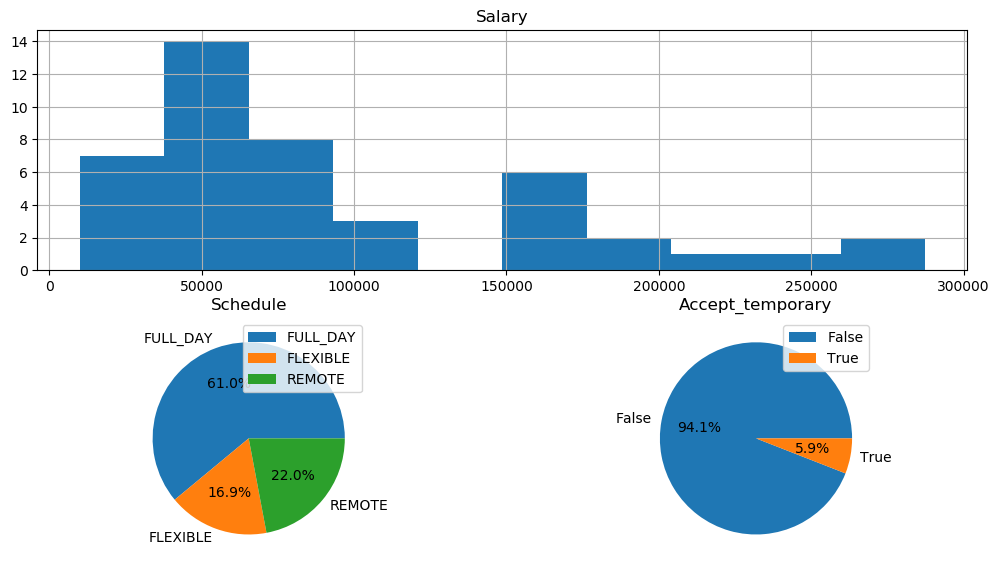

In [9]:
fz = plt.figure(figsize=(12, 7), dpi=100)
fz.add_subplot(2,1,1)
plt.title('Salary')
salary_series.hist()
fz.add_subplot(2,2,3)
make_simple_word_pie(df,"schedule",'Schedule')
fz.add_subplot(2,2,4)
make_simple_word_pie(df,"accept_temporary",'Accept_temporary')

In [10]:
from collections import Counter
import scipy
import re

# source: https://github.com/hukenovs/hh_research/
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['key_skills'].tolist()
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        if type(keys_elem) == str:
            for el in keys_elem[0:].split(', '):
                if el != '':
                    lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='key_skills')


In [11]:
def cut_frequencys (data_series, stat = "median"):
    #частоты частот
    freq = dict(Counter(list(data_series.values)))
    freq_values = list(freq.values())
    freq_values.sort(reverse=True)

    if stat == "mean":
        freq_border = scipy.mean(freq_values)
    else:
        freq_border = scipy.median(freq_values)

    new_series = data_series.copy()    
    for index, value in data_series.items():   
        if freq[value]>freq_border:
            new_series=new_series.drop(labels=index)
   
    return new_series

### Key skills from tags

In [12]:
def make_word_barh(word_series):
    #plt.xticks(rotation='vertical')
    current_series = word_series[:25].sort_values(ascending=True)
    plt.barh(current_series.index, current_series.values)    

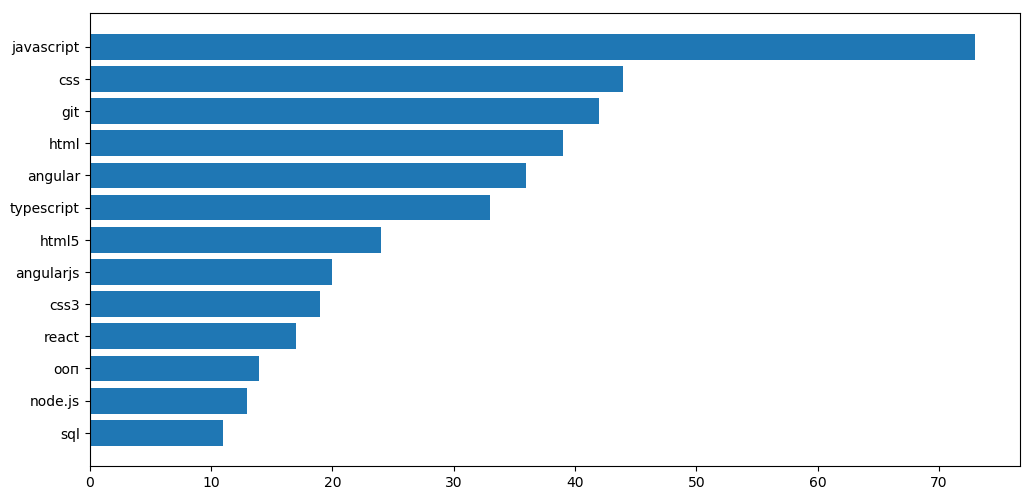

In [13]:
from matplotlib import pyplot as plt
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(cut_frequencys (top_keys(df)))

### Key skills from description

In [14]:
additional_tegs = []
for dsc in df.description:
    searched = re.findall(r"(([A-z]+[\s/-]*)+)+", dsc)
    for pair in searched: 
        addteg = list(pair)[0]
        #addteg = re.sub(r'\s+|\W+','', addteg)
        addteg = re.sub(r'[\s|\W]+','', addteg)
        addteg = addteg.lower()
        if re.search(r'\w+', addteg):
            additional_tegs.append(addteg)    
            
description_freq = pd.Series(Counter(additional_tegs)).sort_values(ascending=False)

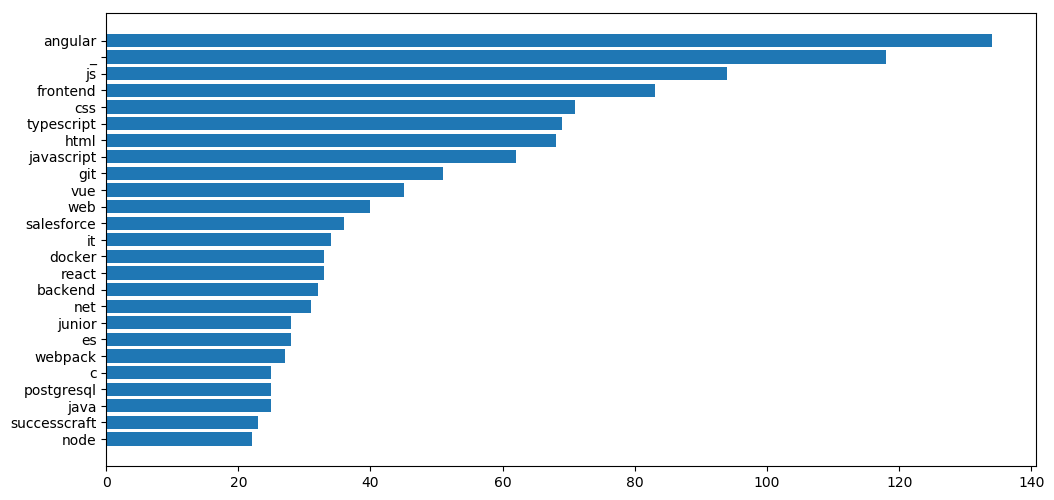

In [15]:
fz = plt.figure(figsize=(12, 6), dpi=100)
fz.add_subplot(1,1,1)
make_word_barh(description_freq)

In [16]:
import time
from IPython.display import display, Javascript
import hashlib

def save_notebook(file_path):
    start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
    display(Javascript('IPython.notebook.save_checkpoint();'))
    current_md5 = start_md5
    
    while start_md5 == current_md5:
        time.sleep(1)
        current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()

report_path = "reports/"+vacancy_search_text
file_name = report_path+".html"

save_notebook("main.ipynb")
! jupyter nbconvert --to html --no-input main.ipynb --output "$report_path"
! start "" "file://%cd:\=/%/$file_name"

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] Writing 419718 bytes to reports/angular frontend junior.html
